In [35]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
import keras.backend as K
import numpy as np
import pandas as pd
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.utils import class_weight
import matplotlib.pyplot as plt

In [2]:
# Store the input data in a dataframe
conflict_data = pd.read_csv("C:/Users/victoriawu/Hackathon2021/conflict-prediction/replication_package/prediction_data/data_Java.csv")

#Show the data
conflict_data.head()

,parallel_changed_file_num,commit_num,file_added,file_removed,file_renamed,file_modified,file_copied,line_added,line_removed,developer_num,...,fix_frequency,improve_frequency,refactor_frequency,remove_frequency,update_frequency,use_frequency,messages_min,messages_max,messages_mean,messages_median
0,0,1,0,3,0,0,0,0,306,1,...,0,0,0,1,0,0,17,17,17.000000,17.0
1,0,15,-11,0,0,-80,0,-759,-254,-3,...,4,0,0,1,0,2,16,133,52.466667,48.0
2,0,3,-2,1,0,3,0,-24,16,0,...,0,0,0,0,1,0,42,62,49.333333,44.0
3,0,2,-7,-11,0,-39,0,-2316,-3378,0,...,0,0,0,0,1,0,17,42,29.500000,29.5
4,0,39,-65,-16,0,-230,0,-9213,-4131,-8,...,4,2,0,2,0,1,0,65,45.904762,45.0


In [3]:
# create an abs_scaler object
abs_scaler = MaxAbsScaler()

# calculate the maximum absolute value for scaling the data using the fit method
abs_scaler.fit(conflict_data)

# transform the data using the parameters calculated by the fit method (the maximum absolute values)
scaled_data = abs_scaler.transform(conflict_data)

# store the results in a data frame
df_scaled = pd.DataFrame(scaled_data, columns=conflict_data.columns)

# visualize the data frame
df_scaled

,parallel_changed_file_num,commit_num,file_added,file_removed,file_renamed,file_modified,file_copied,line_added,line_removed,developer_num,...,fix_frequency,improve_frequency,refactor_frequency,remove_frequency,update_frequency,use_frequency,messages_min,messages_max,messages_mean,messages_median
0,0.000000,0.000119,0.000000,0.000124,0.0,0.000000,0.0,0.000000e+00,1.298694e-05,0.002833,...,0.000000,0.000000,0.0,0.052632,0.000000,0.000000,0.0425,0.041667,0.042500,0.042394
1,0.000000,0.001785,-0.000327,0.000000,0.0,-0.000575,0.0,-4.322792e-05,-1.078001e-05,-0.008499,...,0.210526,0.000000,0.0,0.052632,0.000000,0.086957,0.0400,0.325980,0.131167,0.119701
2,0.000000,0.000357,-0.000059,0.000041,0.0,0.000022,0.0,-1.366891e-06,6.790559e-07,0.000000,...,0.000000,0.000000,0.0,0.000000,0.030303,0.000000,0.1050,0.151961,0.123333,0.109726
3,0.000000,0.000238,-0.000208,-0.000454,0.0,-0.000280,0.0,-1.319050e-04,-1.433657e-04,0.000000,...,0.000000,0.000000,0.0,0.000000,0.030303,0.000000,0.0425,0.102941,0.073750,0.073566
4,0.000000,0.004642,-0.001931,-0.000660,0.0,-0.001654,0.0,-5.247152e-04,-1.753237e-04,-0.022663,...,0.210526,0.181818,0.0,0.105263,0.000000,0.043478,0.0000,0.159314,0.114762,0.112219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26694,0.000000,0.002618,0.000000,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,-0.002833,...,0.157895,0.000000,0.0,0.157895,0.000000,0.000000,0.0450,0.578431,0.170714,0.089776
26695,0.000000,0.000238,0.000030,0.000248,0.0,0.000043,0.0,7.802668e-06,1.065269e-05,0.002833,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.1175,0.115196,0.117500,0.117207
26696,0.000000,0.002499,-0.001960,-0.002022,0.0,-0.001381,0.0,-4.562568e-04,-2.978509e-04,-0.014164,...,0.157895,0.000000,0.0,0.052632,0.090909,0.000000,0.0300,0.379902,0.151071,0.118454
26697,0.000089,0.001904,-0.000267,-0.000083,0.0,-0.000475,0.0,-2.311185e-04,-1.001607e-05,-0.005666,...,0.000000,0.000000,0.0,0.052632,0.000000,0.000000,0.0475,0.132353,0.091250,0.091022


In [4]:
conflict_labels = pd.read_csv("C:/Users/victoriawu/Hackathon2021/conflict-prediction/replication_package/prediction_data/label_Java.csv")

#Show the data
conflict_labels.head()

,is_conflict
0,0
1,0
2,0
3,0
4,0


In [5]:
#Append labels to the training data 
df_scaled.insert(28, 'is_conflict', conflict_labels)

df_scaled

,parallel_changed_file_num,commit_num,file_added,file_removed,file_renamed,file_modified,file_copied,line_added,line_removed,developer_num,...,improve_frequency,refactor_frequency,remove_frequency,update_frequency,use_frequency,messages_min,messages_max,messages_mean,messages_median,is_conflict
0,0.000000,0.000119,0.000000,0.000124,0.0,0.000000,0.0,0.000000e+00,1.298694e-05,0.002833,...,0.000000,0.0,0.052632,0.000000,0.000000,0.0425,0.041667,0.042500,0.042394,0
1,0.000000,0.001785,-0.000327,0.000000,0.0,-0.000575,0.0,-4.322792e-05,-1.078001e-05,-0.008499,...,0.000000,0.0,0.052632,0.000000,0.086957,0.0400,0.325980,0.131167,0.119701,0
2,0.000000,0.000357,-0.000059,0.000041,0.0,0.000022,0.0,-1.366891e-06,6.790559e-07,0.000000,...,0.000000,0.0,0.000000,0.030303,0.000000,0.1050,0.151961,0.123333,0.109726,0
3,0.000000,0.000238,-0.000208,-0.000454,0.0,-0.000280,0.0,-1.319050e-04,-1.433657e-04,0.000000,...,0.000000,0.0,0.000000,0.030303,0.000000,0.0425,0.102941,0.073750,0.073566,0
4,0.000000,0.004642,-0.001931,-0.000660,0.0,-0.001654,0.0,-5.247152e-04,-1.753237e-04,-0.022663,...,0.181818,0.0,0.105263,0.000000,0.043478,0.0000,0.159314,0.114762,0.112219,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26694,0.000000,0.002618,0.000000,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,-0.002833,...,0.000000,0.0,0.157895,0.000000,0.000000,0.0450,0.578431,0.170714,0.089776,0
26695,0.000000,0.000238,0.000030,0.000248,0.0,0.000043,0.0,7.802668e-06,1.065269e-05,0.002833,...,0.000000,0.0,0.000000,0.000000,0.000000,0.1175,0.115196,0.117500,0.117207,0
26696,0.000000,0.002499,-0.001960,-0.002022,0.0,-0.001381,0.0,-4.562568e-04,-2.978509e-04,-0.014164,...,0.000000,0.0,0.052632,0.090909,0.000000,0.0300,0.379902,0.151071,0.118454,0
26697,0.000089,0.001904,-0.000267,-0.000083,0.0,-0.000475,0.0,-2.311185e-04,-1.001607e-05,-0.005666,...,0.000000,0.0,0.052632,0.000000,0.000000,0.0475,0.132353,0.091250,0.091022,0


In [6]:
# Split the data into training (80%) and testing (20%)
train, test = train_test_split(df_scaled, test_size=0.2)

# Split data into features and labels (only using the first 29 columns as 30 is the amount and 31 is the label
train_features = np.array(train.values[:,:27])
train_labels = np.array(train.values[:,-1])
test_features = np.array(test.values[:,:27])
test_labels = np.array(test.values[:,-1])

In [86]:
#Cost sensitive
class_weights = class_weight.compute_class_weight({0:1, 1:5}, np.unique(train_labels), train_labels)
class_weights = {i : class_weights[i] for i in range(2)}

C:\Users\victoriawu\Anaconda3\envs\MSFTHackathon2021\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass classes=[0. 1.], y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [87]:
model = Sequential()
model.add(Dense(units=100, kernel_initializer='uniform', input_dim=train_features.shape[1], activation='relu'))
model.add(Dropout(.2))
model.add(Dense(units=100, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

In [88]:
train_history = model.fit(train_features, train_labels, batch_size=50, epochs=200, verbose=1, validation_split=0.2, class_weight=class_weights)

Epoch 1/200
342/342 [==============================] - 1s 2ms/step - loss: 0.7854 - accuracy: 0.9175 - val_loss: 0.4396 - val_accuracy: 0.9167
Epoch 2/200
342/342 [==============================] - 0s 1ms/step - loss: 0.7270 - accuracy: 0.9184 - val_loss: 0.3482 - val_accuracy: 0.9188
Epoch 3/200
342/342 [==============================] - 0s 1ms/step - loss: 0.7050 - accuracy: 0.9164 - val_loss: 0.4180 - val_accuracy: 0.9129
Epoch 4/200
342/342 [==============================] - 0s 1ms/step - loss: 0.6796 - accuracy: 0.9172 - val_loss: 0.2982 - val_accuracy: 0.9185
Epoch 5/200
342/342 [==============================] - 1s 2ms/step - loss: 0.6628 - accuracy: 0.9143 - val_loss: 0.3747 - val_accuracy: 0.9096
Epoch 6/200
342/342 [==============================] - 0s 1ms/step - loss: 0.6420 - accuracy: 0.9115 - val_loss: 0.3117 - val_accuracy: 0.9115
Epoch 7/200
342/342 [==============================] - 0s 1ms/step - loss: 0.6336 - accuracy: 0.9081 - val_loss: 0.3362 - val_accuracy: 0.9064

342/342 [==============================] - 0s 1ms/step - loss: 0.4725 - accuracy: 0.8928 - val_loss: 0.2867 - val_accuracy: 0.8926
Epoch 58/200
342/342 [==============================] - 0s 1ms/step - loss: 0.4632 - accuracy: 0.8969 - val_loss: 0.2674 - val_accuracy: 0.8944
Epoch 59/200
342/342 [==============================] - 0s 1ms/step - loss: 0.4592 - accuracy: 0.8949 - val_loss: 0.2492 - val_accuracy: 0.8986
Epoch 60/200
342/342 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.8968 - val_loss: 0.2912 - val_accuracy: 0.8855
Epoch 61/200
342/342 [==============================] - 0s 1ms/step - loss: 0.4543 - accuracy: 0.8964 - val_loss: 0.2450 - val_accuracy: 0.9007
Epoch 62/200
342/342 [==============================] - 0s 1ms/step - loss: 0.4542 - accuracy: 0.8953 - val_loss: 0.2190 - val_accuracy: 0.9092
Epoch 63/200
342/342 [==============================] - 0s 1ms/step - loss: 0.4550 - accuracy: 0.8968 - val_loss: 0.2588 - val_accuracy: 0.8989
Epoch

342/342 [==============================] - 0s 1ms/step - loss: 0.3540 - accuracy: 0.9161 - val_loss: 0.2777 - val_accuracy: 0.8879
Epoch 114/200
342/342 [==============================] - 0s 1ms/step - loss: 0.3426 - accuracy: 0.9164 - val_loss: 0.1949 - val_accuracy: 0.9281
Epoch 115/200
342/342 [==============================] - 0s 1ms/step - loss: 0.3539 - accuracy: 0.9175 - val_loss: 0.2244 - val_accuracy: 0.9132
Epoch 116/200
342/342 [==============================] - 0s 1ms/step - loss: 0.3479 - accuracy: 0.9194 - val_loss: 0.2187 - val_accuracy: 0.9118
Epoch 117/200
342/342 [==============================] - 0s 1ms/step - loss: 0.3489 - accuracy: 0.9178 - val_loss: 0.2150 - val_accuracy: 0.9157
Epoch 118/200
342/342 [==============================] - 0s 1ms/step - loss: 0.3490 - accuracy: 0.9150 - val_loss: 0.1981 - val_accuracy: 0.9185
Epoch 119/200
342/342 [==============================] - 0s 1ms/step - loss: 0.3437 - accuracy: 0.9177 - val_loss: 0.1871 - val_accuracy: 0.9347

342/342 [==============================] - 0s 1ms/step - loss: 0.3022 - accuracy: 0.9246 - val_loss: 0.1811 - val_accuracy: 0.9363
Epoch 170/200
342/342 [==============================] - 0s 1ms/step - loss: 0.3146 - accuracy: 0.9245 - val_loss: 0.2519 - val_accuracy: 0.9045
Epoch 171/200
342/342 [==============================] - 0s 1ms/step - loss: 0.3079 - accuracy: 0.9249 - val_loss: 0.2039 - val_accuracy: 0.9244
Epoch 172/200
342/342 [==============================] - 0s 1ms/step - loss: 0.2932 - accuracy: 0.9245 - val_loss: 0.1746 - val_accuracy: 0.9382
Epoch 173/200
342/342 [==============================] - 0s 1ms/step - loss: 0.3021 - accuracy: 0.9243 - val_loss: 0.1888 - val_accuracy: 0.9415
Epoch 174/200
342/342 [==============================] - 0s 1ms/step - loss: 0.2879 - accuracy: 0.9268 - val_loss: 0.2137 - val_accuracy: 0.9211
Epoch 175/200
342/342 [==============================] - 0s 1ms/step - loss: 0.3048 - accuracy: 0.9259 - val_loss: 0.2027 - val_accuracy: 0.9281

In [89]:
# Get model accuracy 
scores = model.evaluate(test_features, test_labels)
print('\n')
print('accuracy=',scores[1])

# Get predictions from model
output = model.predict_classes(test_features)

# Show confusion matrix
y_actu = pd.Series(test_labels, name='Actual')
y_pred = pd.Series(np.ndarray.flatten(output), name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
print(df_confusion, '\n\n')

print(sklearn.metrics.classification_report(y_actu, y_pred))

167/167 [==============================] - 0s 565us/step - loss: 0.2061 - accuracy: 0.9316


accuracy= 0.9316479563713074
Predicted     0    1
Actual              
0.0        4639  270
1.0          95  336 


              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      4909
         1.0       0.55      0.78      0.65       431

    accuracy                           0.93      5340
   macro avg       0.77      0.86      0.81      5340
weighted avg       0.95      0.93      0.94      5340



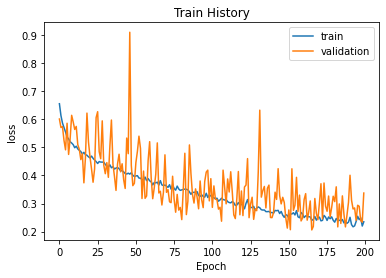

AUC: 0.93


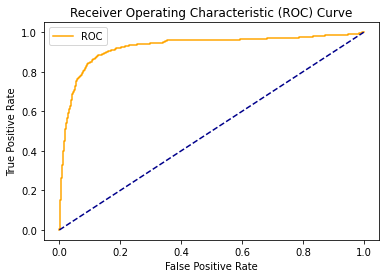

In [78]:
# Function to graph training history
def show_train_history(train_history,train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

show_train_history(train_history,'loss', 'val_loss')


def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

probs = model.predict(test_features)
auc = sklearn.metrics.roc_auc_score(test_labels, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(test_labels, probs)
plot_roc_curve(fpr, tpr)